<a href="https://colab.research.google.com/github/durba-sharma/Project-TME/blob/main/Project_Sentiment_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and Dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd

from google.colab import files
uploaded= files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.shape

(1000, 2)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Preprocessing

In [5]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
corpus=[]

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [7]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Data Transformation

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [17]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [18]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# Dividing dataset into training and test data

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=0)

# Model Fitting(Naive Bayes)

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [22]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

['c2_Classifier_Sentiment_Model']

# Performance

In [25]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2%}")


Accuracy: 73.00%


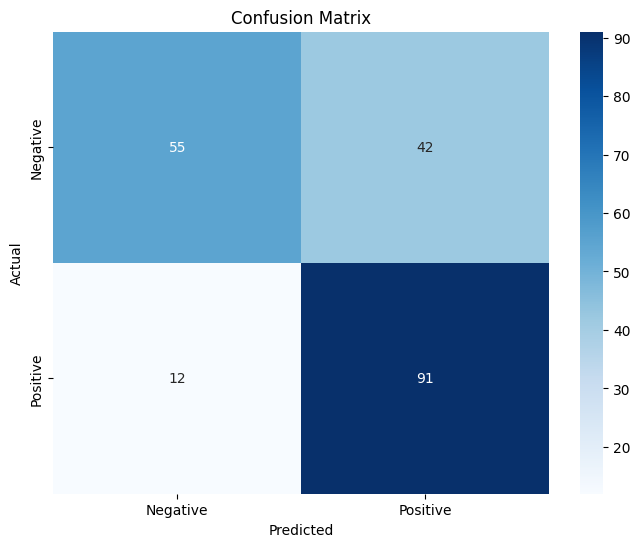

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

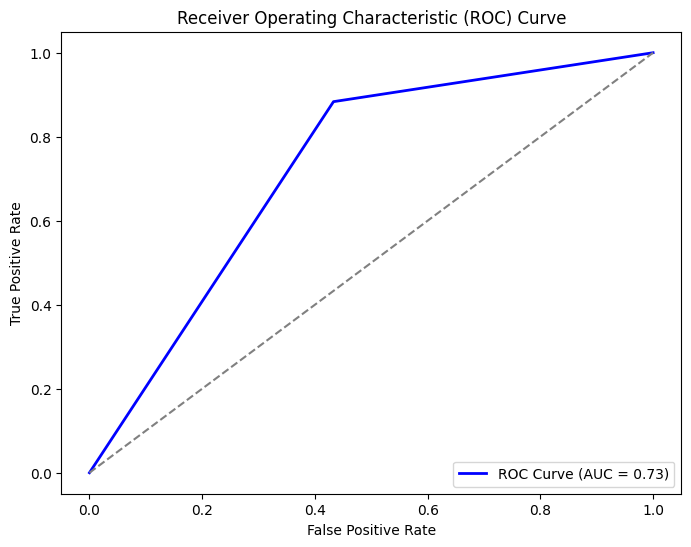

In [28]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for ROC
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [37]:
from sklearn.metrics import classification_report

# Generate classification report for Naïve Bayes
print("Naïve Bayes Classification Report")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Naïve Bayes Classification Report
              precision    recall  f1-score   support

    Negative       0.82      0.57      0.67        97
    Positive       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [29]:
# Display sample predictions
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_indices:
    print(f"Review: {corpus[idx]}")
    print(f"Actual Sentiment: {'Positive' if y_test[idx] == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[idx] == 1 else 'Negative'}\n")


Review: least min pass us order food arriv busi
Actual Sentiment: Positive
Predicted Sentiment: Positive

Review: food delici bartend attent person got great deal
Actual Sentiment: Positive
Predicted Sentiment: Positive

Review: ambienc wonder music play
Actual Sentiment: Positive
Predicted Sentiment: Positive

Review: 
Actual Sentiment: Positive
Predicted Sentiment: Negative

Review: say food amaz
Actual Sentiment: Negative
Predicted Sentiment: Negative



# LSTM Model


In [30]:
#importing library
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, LSTM, Dropout
from keras.utils import to_categorical

# Tokenize and Pad Sequences

In [31]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(corpus)

# Convert text to sequences and pad them
X_seq = tokenizer.texts_to_sequences(corpus)
X_padded = pad_sequences(X_seq, maxlen=100)

**Train-Test Split**

In [32]:
# Update train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=0)

# Define the LSTM Model

In [33]:
# Function to create the LSTM model
def create_lstm_model(input_dim, output_dim, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))  # Removed input_length
    model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
    model.add(Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax'))
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy' if num_classes == 1 else 'categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Model parameters
input_dim = len(tokenizer.word_index) + 1  # Vocabulary size
output_dim = 100  # Embedding dimensions
input_length = X_padded.shape[1]  # Sequence length
num_classes = 1  # Binary classification

# Create the model
lstm_model = create_lstm_model(input_dim, output_dim, num_classes)

# Train the LSTM Model

In [39]:
print("Training LSTM model...")
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
    )

Training LSTM model...
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.9923 - loss: 0.0275 - val_accuracy: 0.7625 - val_loss: 0.9507
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9887 - loss: 0.0310 - val_accuracy: 0.7625 - val_loss: 0.9815
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9888 - loss: 0.0272 - val_accuracy: 0.7625 - val_loss: 0.8889
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.7563 - val_loss: 0.9305
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9929 - loss: 0.0192 - val_accuracy: 0.7688 - val_loss: 0.9694
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.9910 - loss: 0.0240 - val_accuracy: 0.7688 - val_loss: 1.0002
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9893 - loss: 0.0243 - val_accuracy: 0.7563 - val_loss: 1.0276
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9930 - loss: 0.

# Evaluate the Model

In [40]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7645 - loss: 1.3012
LSTM Test Accuracy: 75.00%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


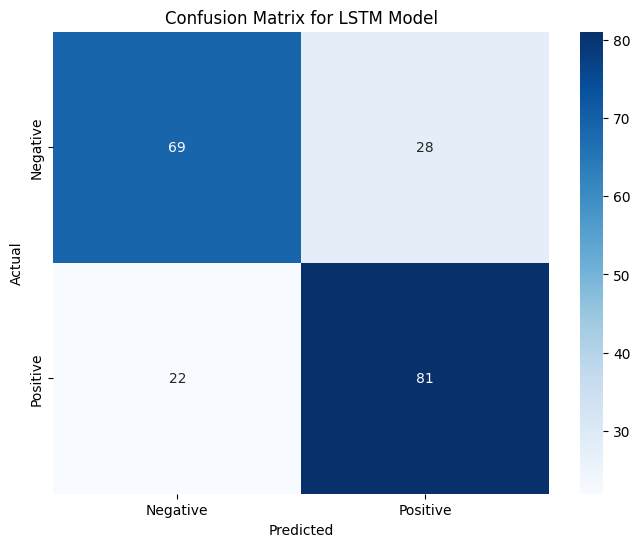

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make Predictions (Get Probabilities and Convert to Binary Classifications)
y_pred_lstm = lstm_model.predict(X_test)  # Get model predictions (probabilities)
y_pred_binary = (y_pred_lstm > 0.5).astype(int)  # Convert probabilities to binary class (0 or 1)

# Step 2: Compute Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_binary)

# Step 3: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [42]:
# Generate classification report for LSTM
print("LSTM Classification Report")
print(classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive']))

LSTM Classification Report
              precision    recall  f1-score   support

    Negative       0.76      0.71      0.73        97
    Positive       0.74      0.79      0.76       103

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

